In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.image as img
import matplotlib.pyplot as plt

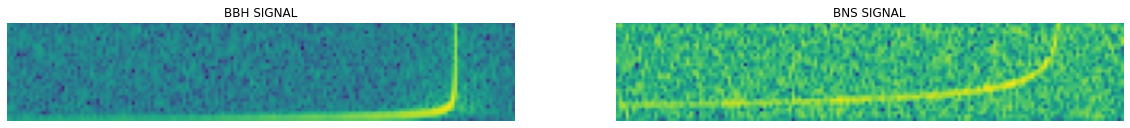

In [2]:
# Let's have a look at two major class (BBH and BNS) images
path = ['./spec_grav_data/test/bbh/bbh_19.0_11.0_11.jpg', './spec_grav_data/test/bns/bns_1.2_1.2_22.jpg']
fig, axes = plt.subplots(1, 2, figsize=(20, 12))
for i in range(2):
    image = img.imread(path[i])
    title = path[i].split('/')[-2].upper()
    axes[i].set_title(f'{title} SIGNAL')
    axes[i].imshow(image)
    axes[i].axis('off');

In [3]:
test_img = ImageDataGenerator(
               rescale=1./255
           )

In [4]:
test_gen = test_img.flow_from_directory(
               './spec_grav_data/test',
               target_size=(256, 64),
               batch_size=1,
               class_mode='sparse',
               classes=['bbh', 'bns', 'noise']
           )

Found 1500 images belonging to 3 classes.


In [5]:
model = load_model('./spec_grav_model_files/spec-grav-10-1.00.hdf5')

In [6]:
pred = model.evaluate(test_gen)

1500/1500 [==============================] - 9s 6ms/step - loss: 3.1784e-05 - accuracy: 1.0000


In [7]:
print(f'Test Accuracy: {pred[1]}')
print(f'Test Loss: {pred[0]}')

Test Accuracy: 1.0
Test Loss: 3.17841004289221e-05
